<a href="https://colab.research.google.com/github/itsmesudhanshu/Machine-learning/blob/main/Machine_learning_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Setting the number of data points
num_points=200

#Generate random values for x
X= np.random.rand(num_points,1)*10
# Define the relationship between x and y
m=2 # slope
c=5 # Intercept
noise = np.random.randn(num_points,1)*2
# Genertae y values based on the relationship and noise
y=m*X + c + noise

In [ ]:
# create a dataframwe for easier data handling and data manipulation
df=pd.DataFrame({"X": X.flatten(),"y":y.flatten()})

In [ ]:
df

,X,y
0,3.301658,13.023497
1,0.923795,6.025695
2,8.733951,22.122602
3,8.590776,19.150175
4,4.651436,12.086269
...,...,...
195,7.341609,18.015048
196,4.502723,11.703601
197,1.383972,10.637293
198,4.136901,12.280173


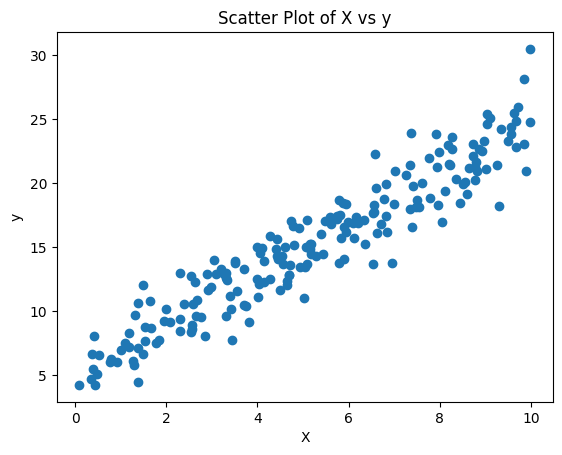

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["X"], df["y"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot of X vs y")
plt.show()

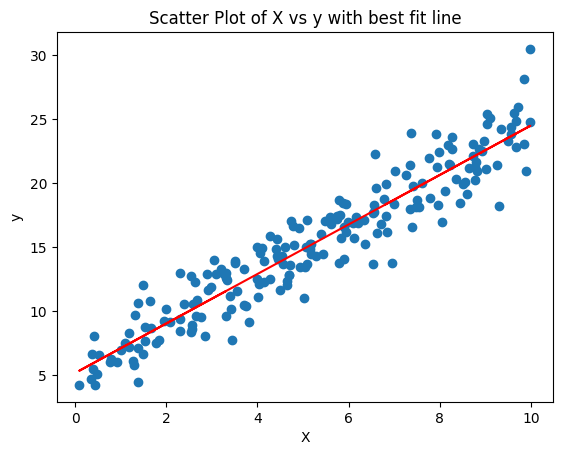

In [ ]:
#  Calculating the best fit line for parameter
from numpy.polynomial.polynomial import polyfit
b,m = polyfit(df["X"],df["y"],1)
# Scatter plot
plt.scatter(df["X"], df["y"])
# plotting the best fit line
plt.plot(df["X"], b+m*df["X"],"-",color="red")
# Adding labels and title
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot of X vs y with best fit line")
# Show plot
plt.show()

#Multiple Linear Regression

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#Set the number of datapoint
num_point1=200
#Genertae random values for x1 and x2
x1= np.random.rand(num_point1,1)*10
x2=np.random.rand(num_point1,1)*5
# Define the relationship between x1, x2 and y
# The equation will be: y_m=2*x1+3*x2 + 5 +noise
noise_m=np.random.rand(num_point1,1)*2
y_m=2*x1 +3*x2 + 5 + noise_m
#Creating a dataFrame
mlr_data=pd.DataFrame({"x1":x1.flatten(), "x2":x2.flatten(),"y_m":y_m.flatten()})


In [17]:
import plotly.express as px
fig=px.scatter_3d(mlr_data, x="x1", y="x2", z="y_m", title="Multiple Linear Regression")
fig.show()

In [8]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression object
model=LinearRegression()
# Define the independent variable (X) and dapendent
X_m=mlr_data[["x1","x2"]]
y_m= mlr_data["y_m"]
# Fit the model
model.fit(X_m,y_m)
# Get the coefficients and intercept
coefficients_m=model.coef_
intercept_m= model.intercept_
# Print the coefficient
print("Coefficient:", coefficients_m)
print("intercept_m:", intercept_m)


Coefficient: [1.99378006 2.96706145]
intercept_m: 6.088867184205309


In [14]:
import plotly.graph_objects as go
import numpy as np

# Create the meshgrid for the plane
x1_range = np.linspace(mlr_data['x1'].min(), mlr_data['x1'].max(), 10)
x2_range = np.linspace(mlr_data['x2'].min(), mlr_data['x2'].max(), 10)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Calculate the predicted values for the plane
y_m = model.coef_[0] * X1 + model.coef_[1] * X2 + model.intercept_

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=mlr_data['x1'],
    y=mlr_data['x2'],
    z=mlr_data['y_m'],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
)])

# Add the best-fit plane
fig.add_trace(go.Surface(
    x=X1,
    y=X2,
    z=y_m,
    colorscale='Viridis',
    opacity=0.7  # Adjust opacity as needed
))

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='x1',
        yaxis_title='x2',
        zaxis_title='y_m'
    ),
    title='Multiple Linear Regression with Best-Fit Plane'
)

fig.show()